In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("/content/Software Engineer Salaries.csv")
df.head()

Company  Company Score  \
0                       ViewSoft            4.8   
1                        Workiva            4.3   
2     Garmin International, Inc.            3.9   
3                       Snapchat            3.5   
4  Vitesco Technologies Group AG            3.1   

                                           Job Title         Location Date  \
0                                  Software Engineer     Manassas, VA   8d   
1                          Software Support Engineer           Remote   2d   
2                               C# Software Engineer         Cary, NC   2d   
3  Software Engineer, Fullstack, 1+ Years of Expe...  Los Angeles, CA   2d   
4                                  Software Engineer       Seguin, TX   2d   

                          Salary  
0   $68K - $94K (Glassdoor est.)  
1   $61K - $104K (Employer est.)  
2  $95K - $118K (Glassdoor est.)  
3   $97K - $145K (Employer est.)  
4  $85K - $108K (Glassdoor est.)

In [3]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        868 non-null    object 
 1   Company Score  789 non-null    float64
 2   Job Title      870 non-null    object 
 3   Location       857 non-null    object 
 4   Date           870 non-null    object 
 5   Salary         764 non-null    object 
dtypes: float64(1), object(5)
memory usage: 40.9+ KB


In [10]:
import re
def clean_salary(salary):
    if pd.isna(salary):
        return np.nan, np.nan
    # Remove non-numeric characters and extra spaces
    salary = re.sub(r'[^\d\-]', '', salary)  # Remove non-numeric characters except '-' (for range)
    if '-' in salary:
        min_salary, max_salary = salary.split('-')
        return float(min_salary.strip()), float(max_salary.strip())
    else:
        return float(salary.strip()), float(salary.strip())

# Apply the function to the Salary column
df[['Min Salary', 'Max Salary']] = df['Salary'].apply(lambda x: pd.Series(clean_salary(x)))

# Create a new column for Average Salary
df['Average Salary'] = (df['Min Salary'] + df['Max Salary']) / 2

# Display the cleaned DataFrame
print(df[['Company', 'Salary', 'Min Salary', 'Max Salary', 'Average Salary']])


                           Company                         Salary  Min Salary  \
0                         ViewSoft   $68K - $94K (Glassdoor est.)        68.0   
1                          Workiva   $61K - $104K (Employer est.)        61.0   
2       Garmin International, Inc.  $95K - $118K (Glassdoor est.)        95.0   
3                         Snapchat   $97K - $145K (Employer est.)        97.0   
4    Vitesco Technologies Group AG  $85K - $108K (Glassdoor est.)        85.0   
..                             ...                            ...         ...   
865                            RXO                            NaN         NaN   
866                        Infosys                            NaN         NaN   
867                      Medtronic                            NaN         NaN   
868                            NaN                            NaN         NaN   
869                            NaN                            NaN         NaN   

     Max Salary  Average Sa

In [11]:
df.isnull().sum()

Company             2
Company Score      81
Job Title           0
Location           13
Date                0
Salary            106
Min Salary        106
Max Salary        106
Average Salary    106
dtype: int64

In [12]:
df.describe()

Company Score    Min Salary    Max Salary  Average Salary
count     789.000000    764.000000    764.000000      764.000000
mean        3.895311    285.835079    358.734293      322.284686
std         0.524952   1093.167840   1197.767136     1142.452072
min         1.000000      6.000000      7.000000        6.500000
25%         3.600000     80.000000    117.000000       99.500000
50%         3.900000     97.000000    140.500000      120.000000
75%         4.200000    124.000000    184.000000      153.500000
max         5.000000  10500.000000  11500.000000    11000.000000

In [18]:
df['Min Salary'].fillna(df['Min Salary'].mean(), inplace=True)
df['Max Salary'].fillna(df['Max Salary'].mean(), inplace=True)
df['Average Salary'].fillna(df['Average Salary'].mean(), inplace=True)
df['Company Score'].fillna(df['Company Score'].mean(), inplace=True)

In [15]:
df= df.dropna(subset=['Company', 'Location'])

In [16]:
df.isnull().sum()

Company             0
Company Score       0
Job Title           0
Location            0
Date                0
Salary            102
Min Salary          0
Max Salary          0
Average Salary      0
dtype: int64

In [19]:
summary_stats = df[['Company Score', 'Min Salary', 'Max Salary', 'Average Salary']].describe()

print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
       Company Score    Min Salary    Max Salary  Average Salary
count     855.000000    855.000000    855.000000      855.000000
mean        3.894894    270.609565    340.563623      305.586594
std         0.501052    958.530377   1041.050987      997.005933
min         1.000000      6.000000      7.000000        6.500000
25%         3.600000     82.000000    120.000000      102.000000
50%         3.895311    102.000000    150.000000      126.500000
75%         4.100000    146.000000    216.000000      180.750000
max         5.000000  10000.000000  10000.000000    10000.000000


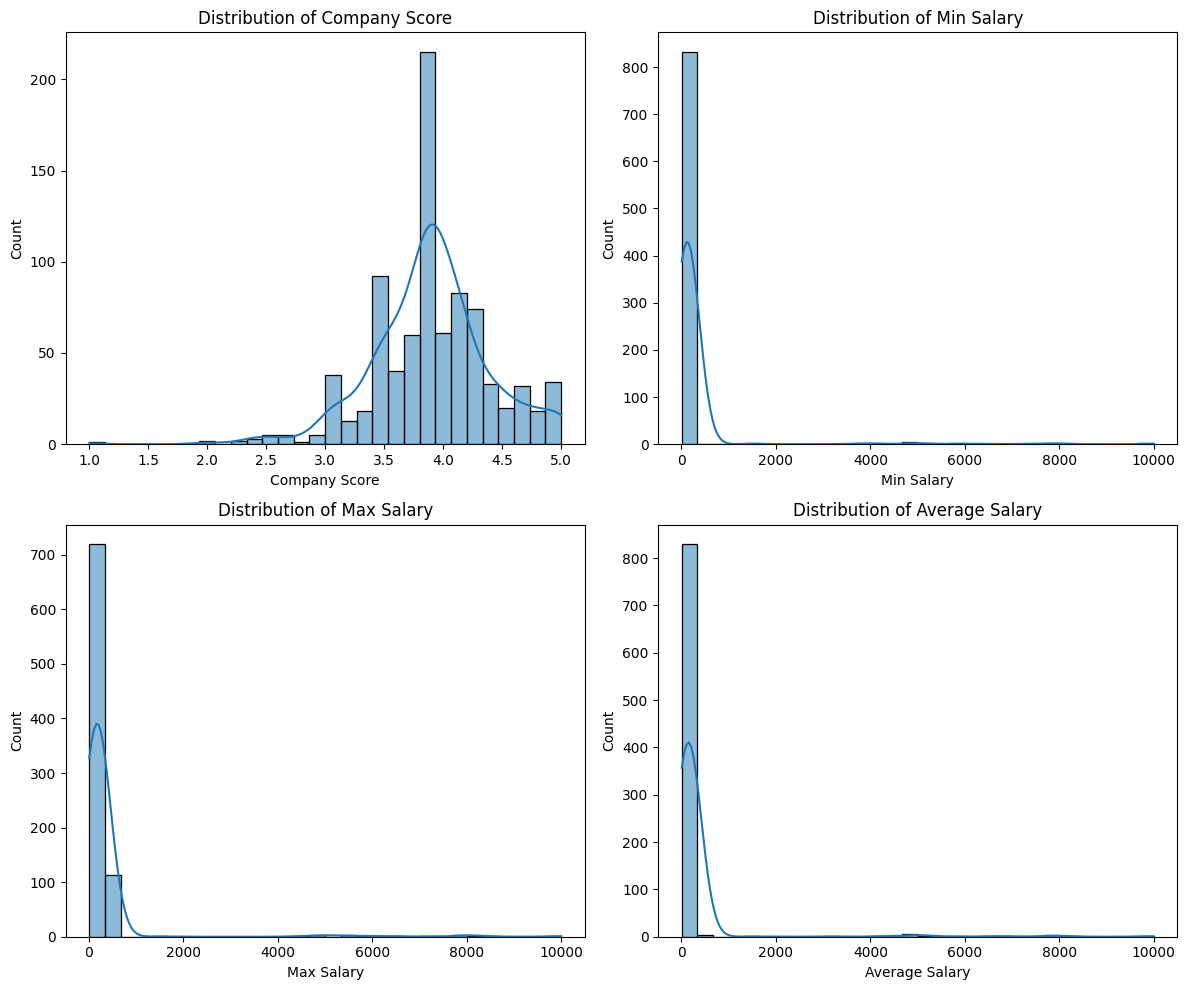

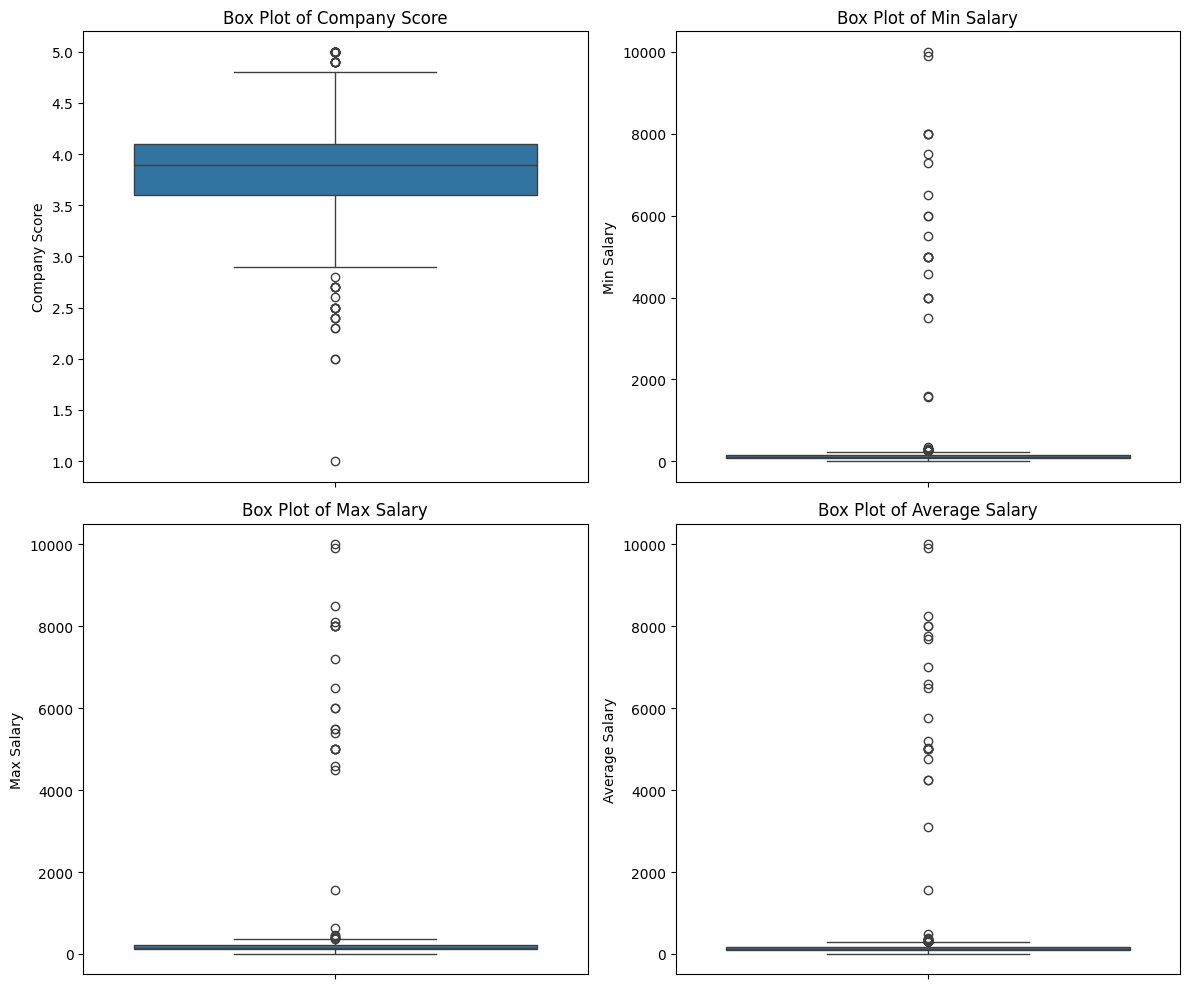

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting area
plt.figure(figsize=(12, 10))

# Plot histograms
plt.subplot(2, 2, 1)
sns.histplot(df['Company Score'].dropna(), kde=True, bins=30)
plt.title('Distribution of Company Score')

plt.subplot(2, 2, 2)
sns.histplot(df['Min Salary'].dropna(), kde=True, bins=30)
plt.title('Distribution of Min Salary')

plt.subplot(2, 2, 3)
sns.histplot(df['Max Salary'].dropna(), kde=True, bins=30)
plt.title('Distribution of Max Salary')

plt.subplot(2, 2, 4)
sns.histplot(df['Average Salary'].dropna(), kde=True, bins=30)
plt.title('Distribution of Average Salary')

plt.tight_layout()
plt.show()

# Plot box plots
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.boxplot(df['Company Score'].dropna())
plt.title('Box Plot of Company Score')

plt.subplot(2, 2, 2)
sns.boxplot(df['Min Salary'].dropna())
plt.title('Box Plot of Min Salary')

plt.subplot(2, 2, 3)
sns.boxplot(df['Max Salary'].dropna())
plt.title('Box Plot of Max Salary')

plt.subplot(2, 2, 4)
sns.boxplot(df['Average Salary'].dropna())
plt.title('Box Plot of Average Salary')

plt.tight_layout()
plt.show()


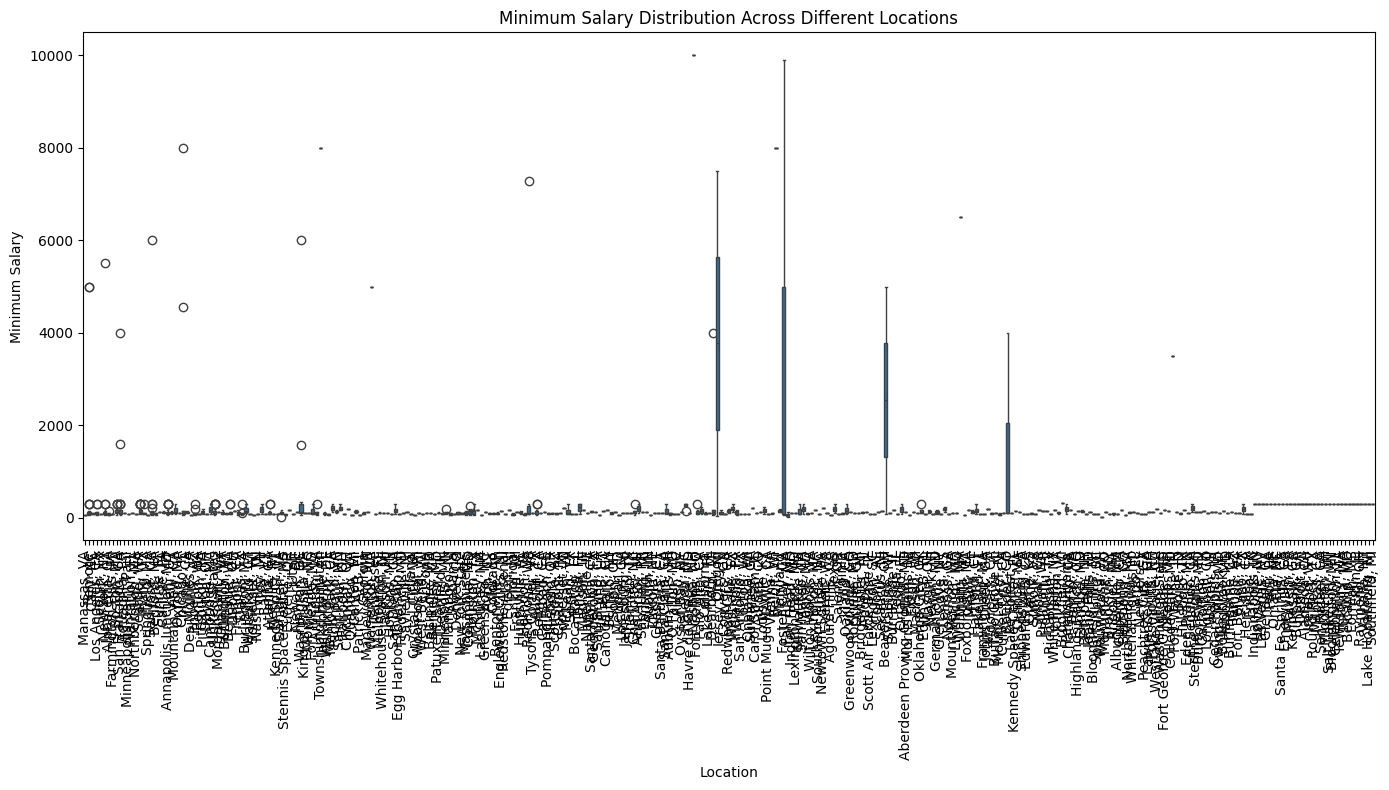

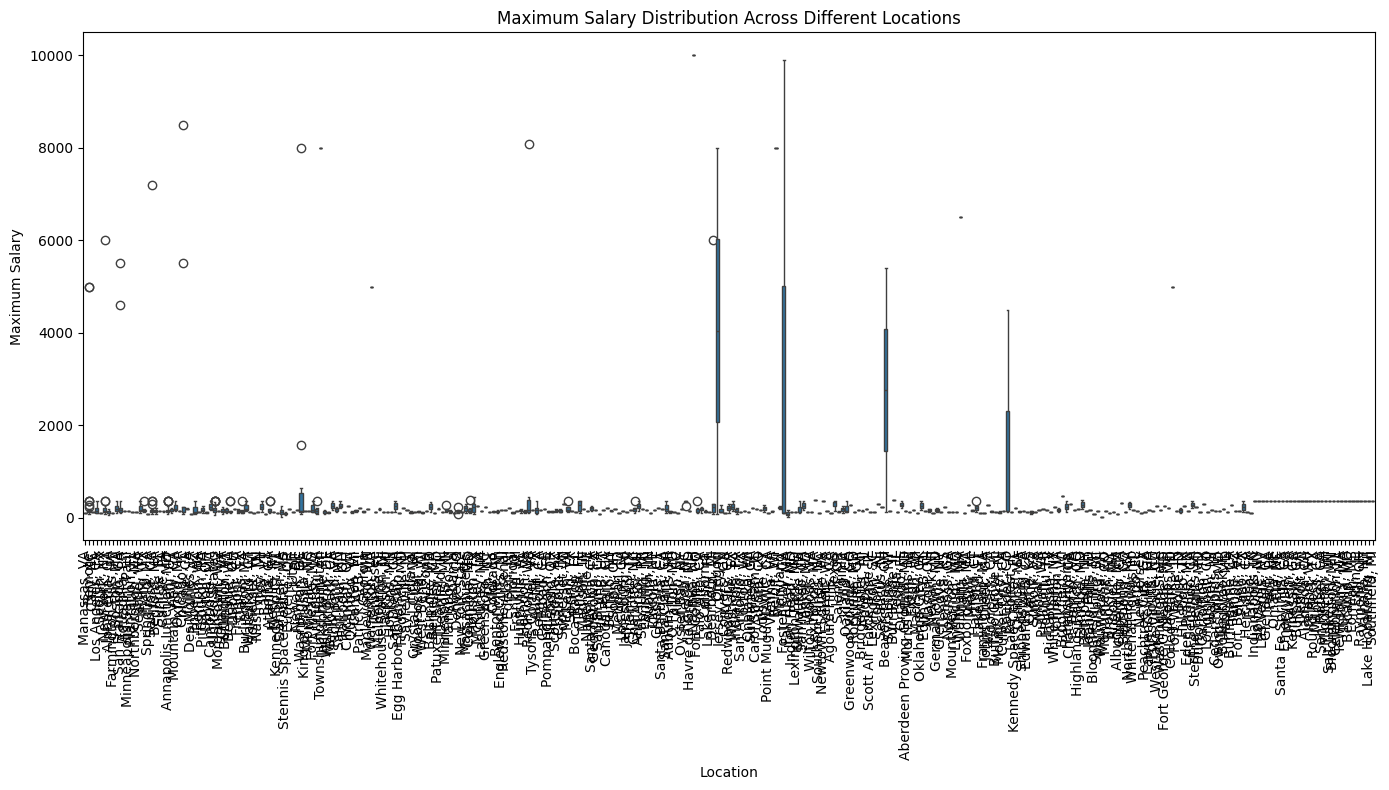

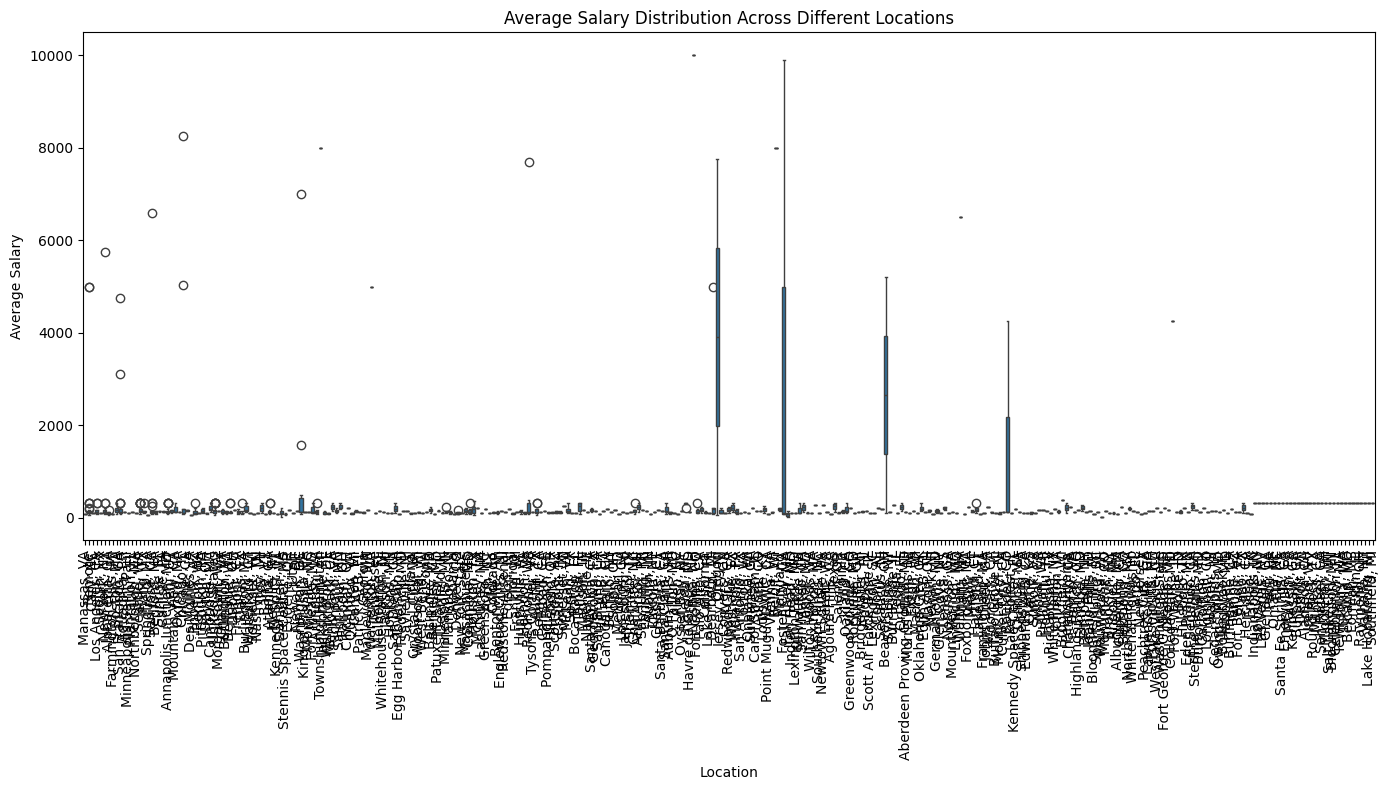

In [22]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Location', y='Min Salary', data=df)
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.title('Minimum Salary Distribution Across Different Locations')
plt.xlabel('Location')
plt.ylabel('Minimum Salary')
plt.tight_layout()
plt.show()

# Plot distribution of maximum salaries by location
plt.figure(figsize=(14, 8))
sns.boxplot(x='Location', y='Max Salary', data=df)
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.title('Maximum Salary Distribution Across Different Locations')
plt.xlabel('Location')
plt.ylabel('Maximum Salary')
plt.tight_layout()
plt.show()

# Plot distribution of average salaries by location
plt.figure(figsize=(14, 8))
sns.boxplot(x='Location', y='Average Salary', data=df)
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.title('Average Salary Distribution Across Different Locations')
plt.xlabel('Location')
plt.ylabel('Average Salary')
plt.tight_layout()
plt.show()

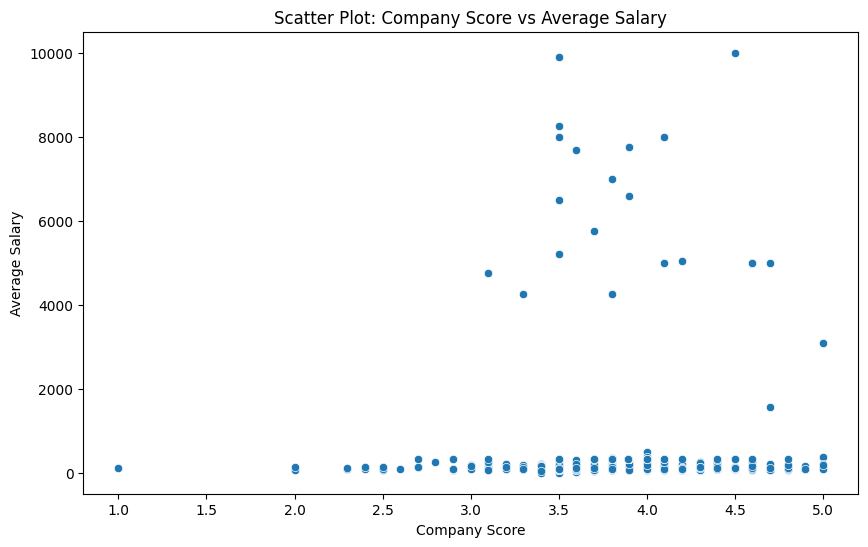

Correlation Coefficient between Company Score and Average Salary: 0.00


In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Company Score', y='Average Salary', data=df)
plt.title('Scatter Plot: Company Score vs Average Salary')
plt.xlabel('Company Score')
plt.ylabel('Average Salary')
plt.show()

# Calculate the correlation coefficient
correlation = df[['Company Score', 'Average Salary']].corr().iloc[0, 1]
print(f'Correlation Coefficient between Company Score and Average Salary: {correlation:.2f}')

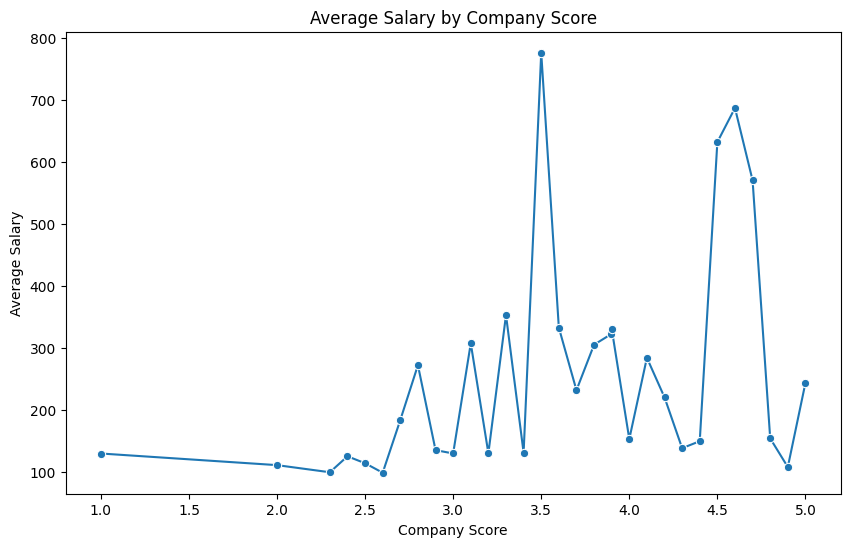

In [24]:
salary_by_score = df.groupby('Company Score')['Average Salary'].mean().reset_index()

# Plot the average salary by Company Score
plt.figure(figsize=(10, 6))
sns.lineplot(x='Company Score', y='Average Salary', data=salary_by_score, marker='o')
plt.title('Average Salary by Company Score')
plt.xlabel('Company Score')
plt.ylabel('Average Salary')
plt.show()

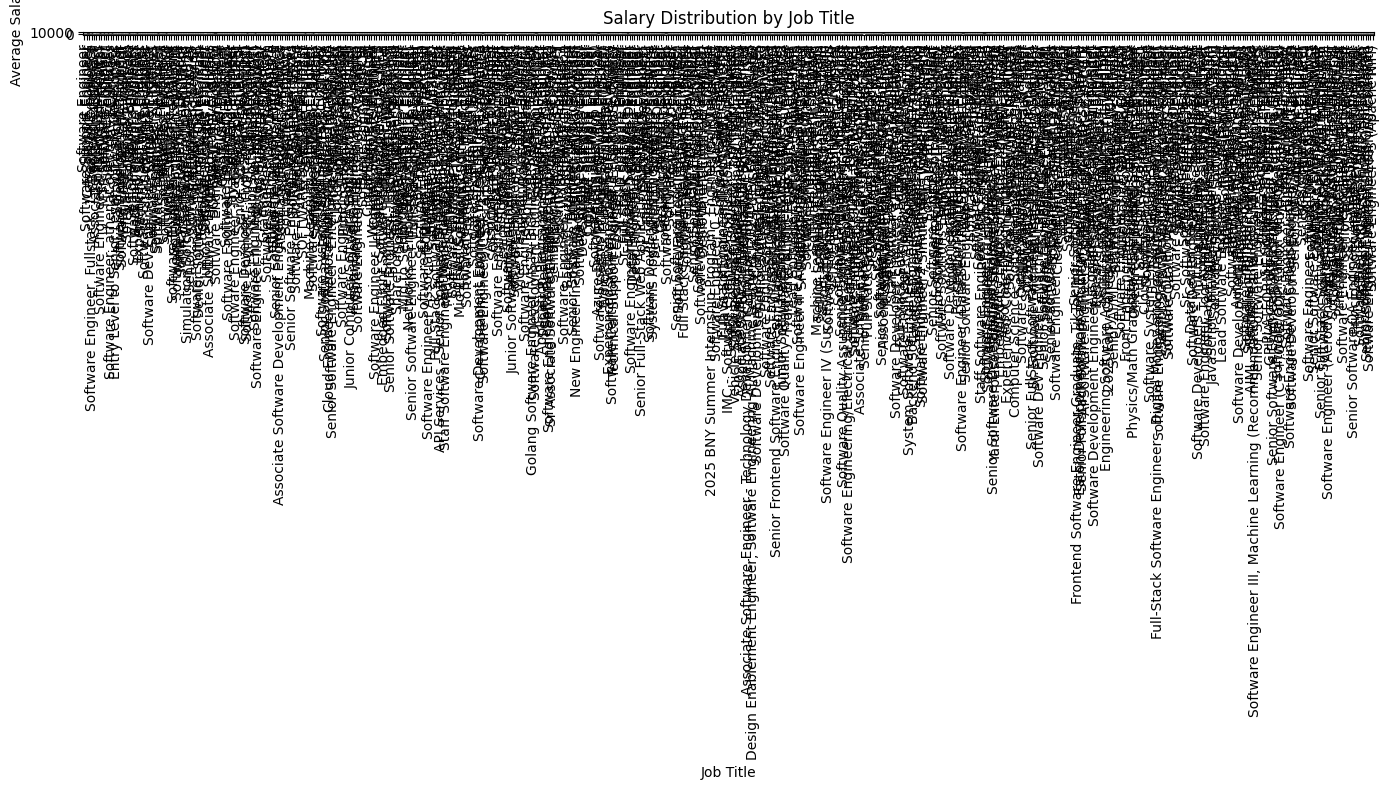

In [25]:
# Plot distribution of average salaries by job title
plt.figure(figsize=(14, 8))
sns.boxplot(x='Job Title', y='Average Salary', data=df)
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.title('Salary Distribution by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.tight_layout()
plt.show()

<ipython-input-26-afd5905a87ac>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Job Title', data=job_title_counts, palette='viridis')


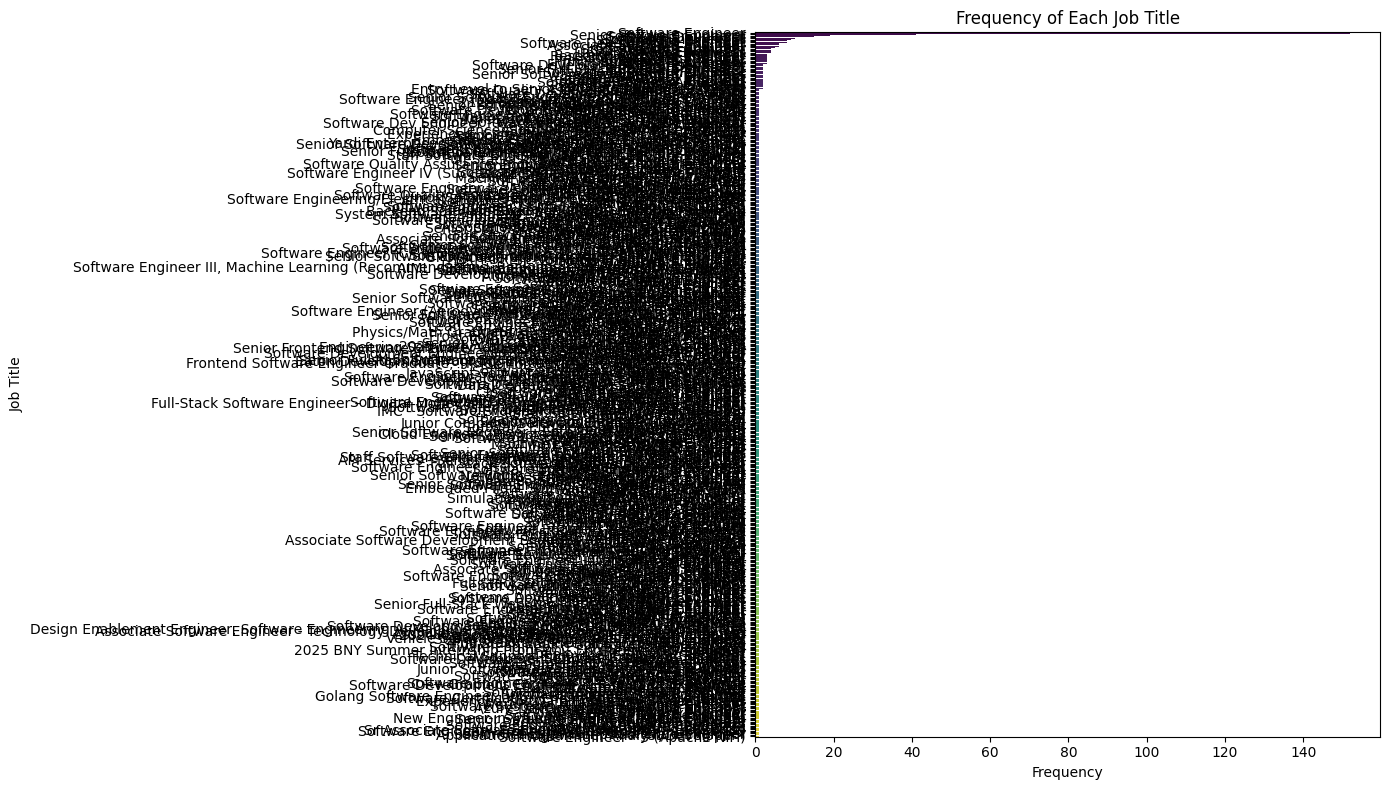

In [26]:
job_title_counts = df['Job Title'].value_counts().reset_index()
job_title_counts.columns = ['Job Title', 'Frequency']

# Plot the frequency of job titles
plt.figure(figsize=(14, 8))
sns.barplot(x='Frequency', y='Job Title', data=job_title_counts, palette='viridis')
plt.title('Frequency of Each Job Title')
plt.xlabel('Frequency')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()

<ipython-input-28-9576f8753cf8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Company', y='Average Salary', data=df, palette='viridis')


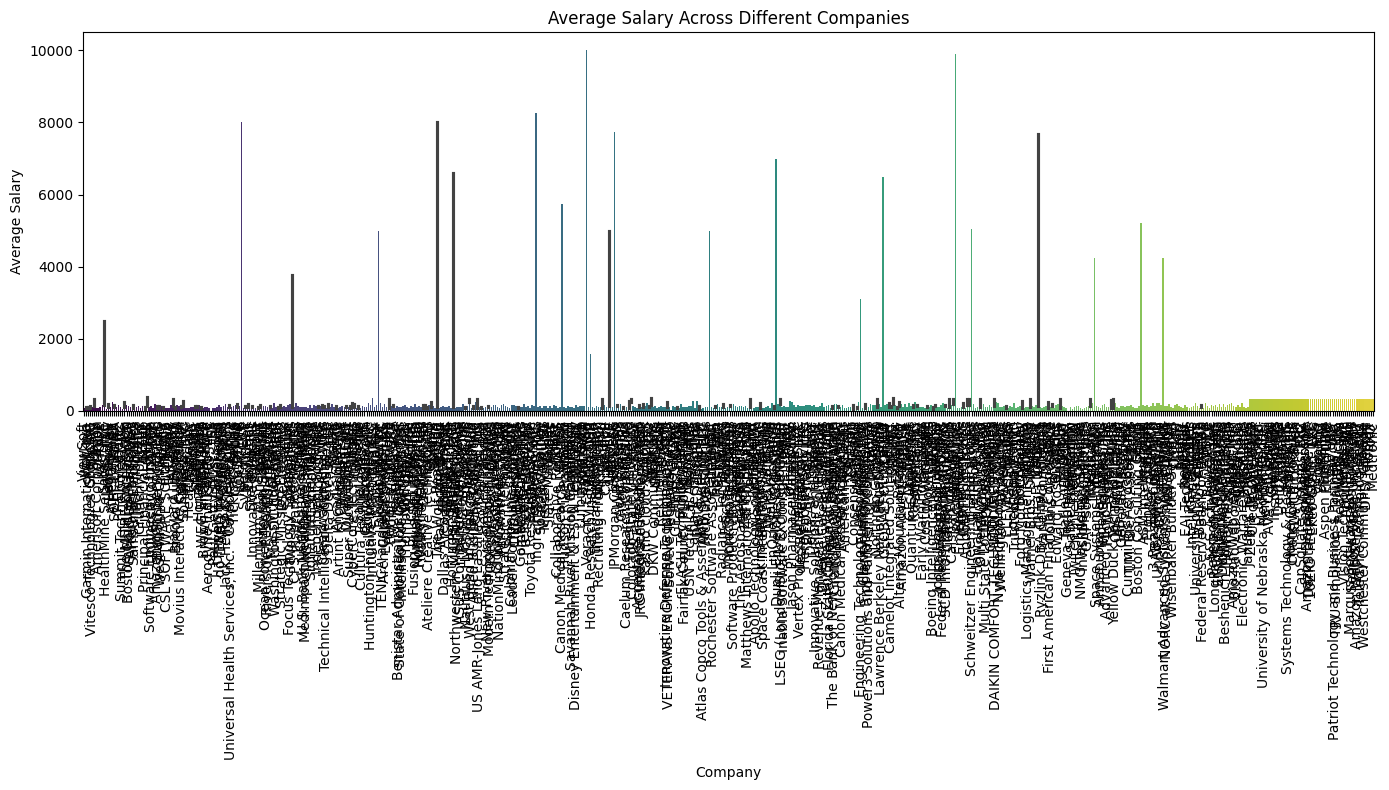

In [28]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Company', y='Average Salary', data=df, palette='viridis')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.title('Average Salary Across Different Companies')
plt.xlabel('Company')
plt.ylabel('Average Salary')
plt.tight_layout()
plt.show()

<ipython-input-29-b71577eefc0c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Location', y='Average Salary', data=df, palette='viridis')


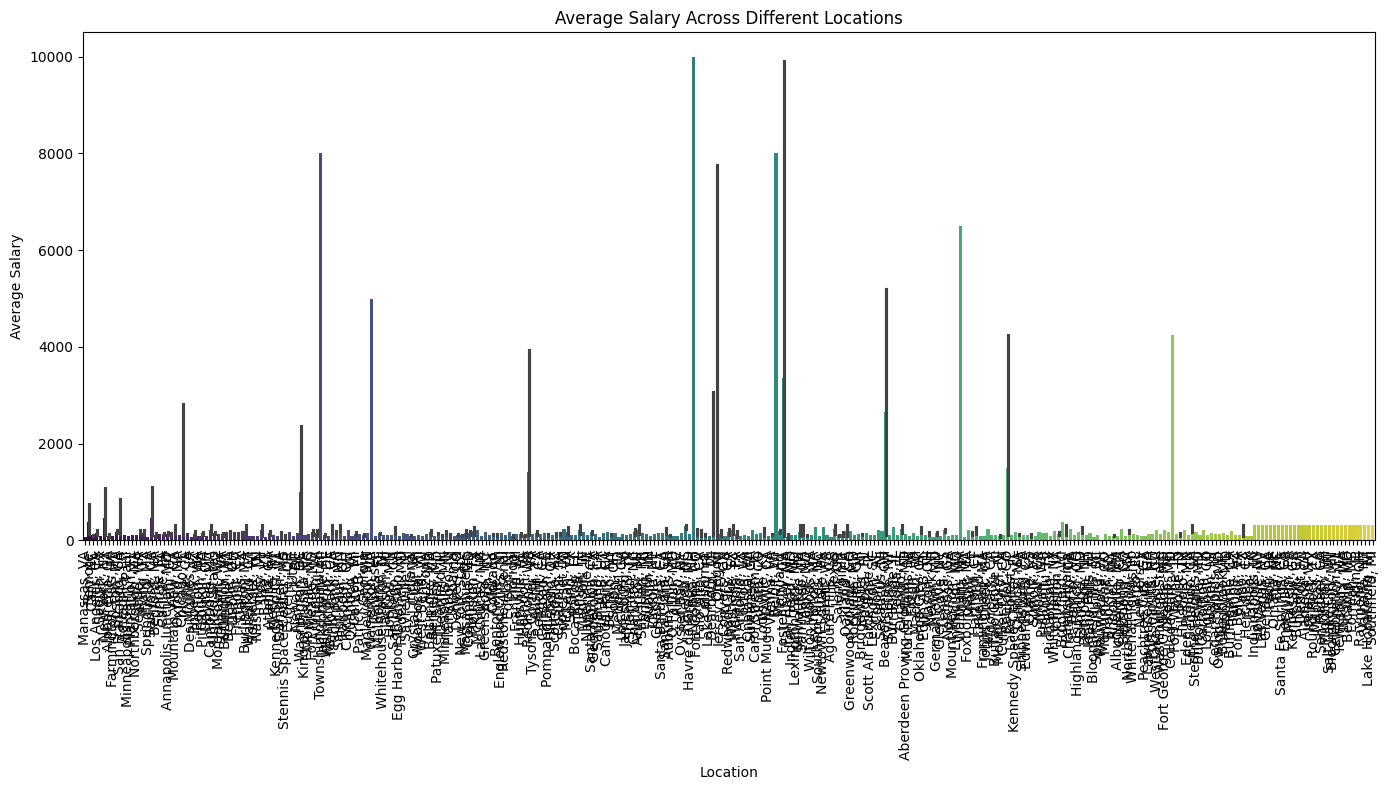

In [29]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Location', y='Average Salary', data=df, palette='viridis')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.title('Average Salary Across Different Locations')
plt.xlabel('Location')
plt.ylabel('Average Salary')
plt.tight_layout()
plt.show()

<ipython-input-30-8df310d867f6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Job Title', y='Average Salary', data=df, palette='viridis')


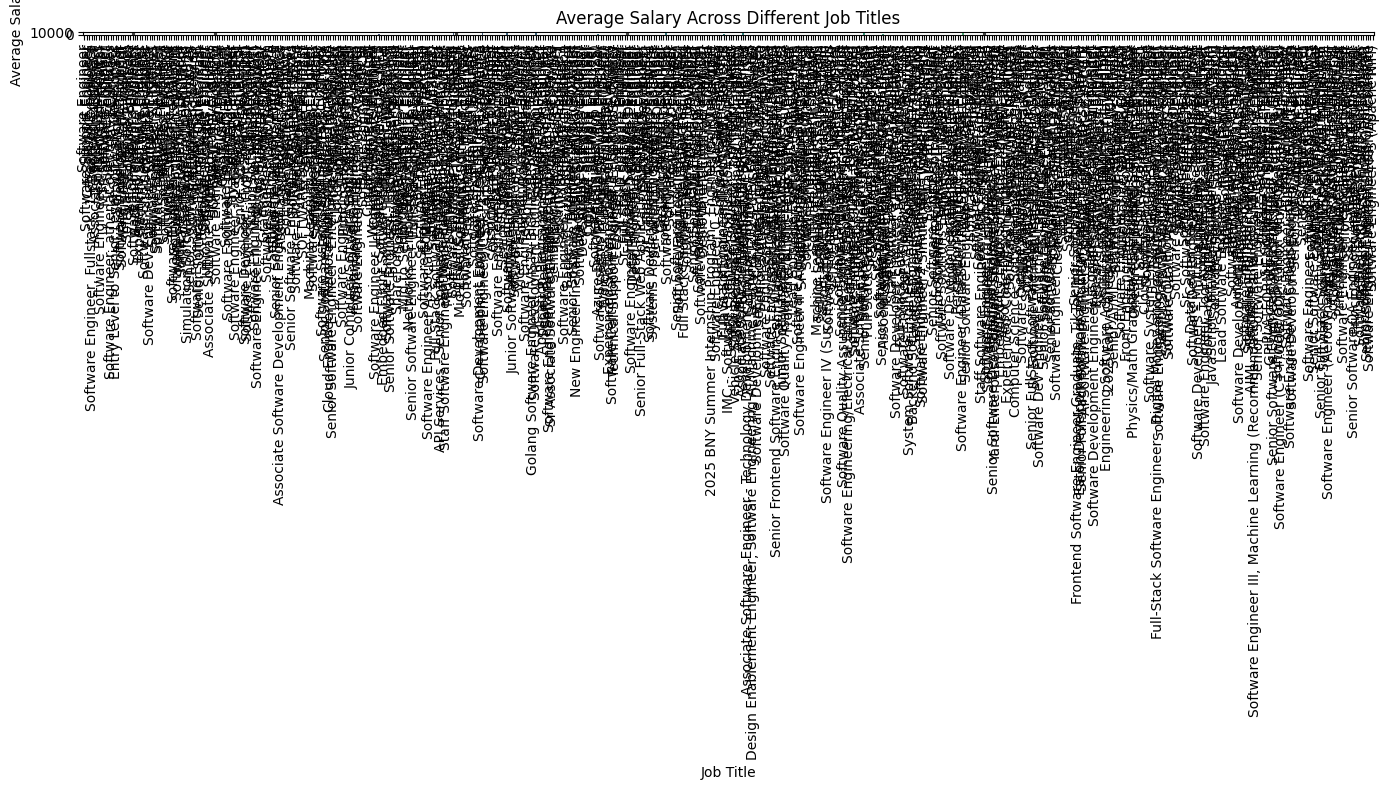

In [30]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Job Title', y='Average Salary', data=df, palette='viridis')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.title('Average Salary Across Different Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.tight_layout()
plt.show()

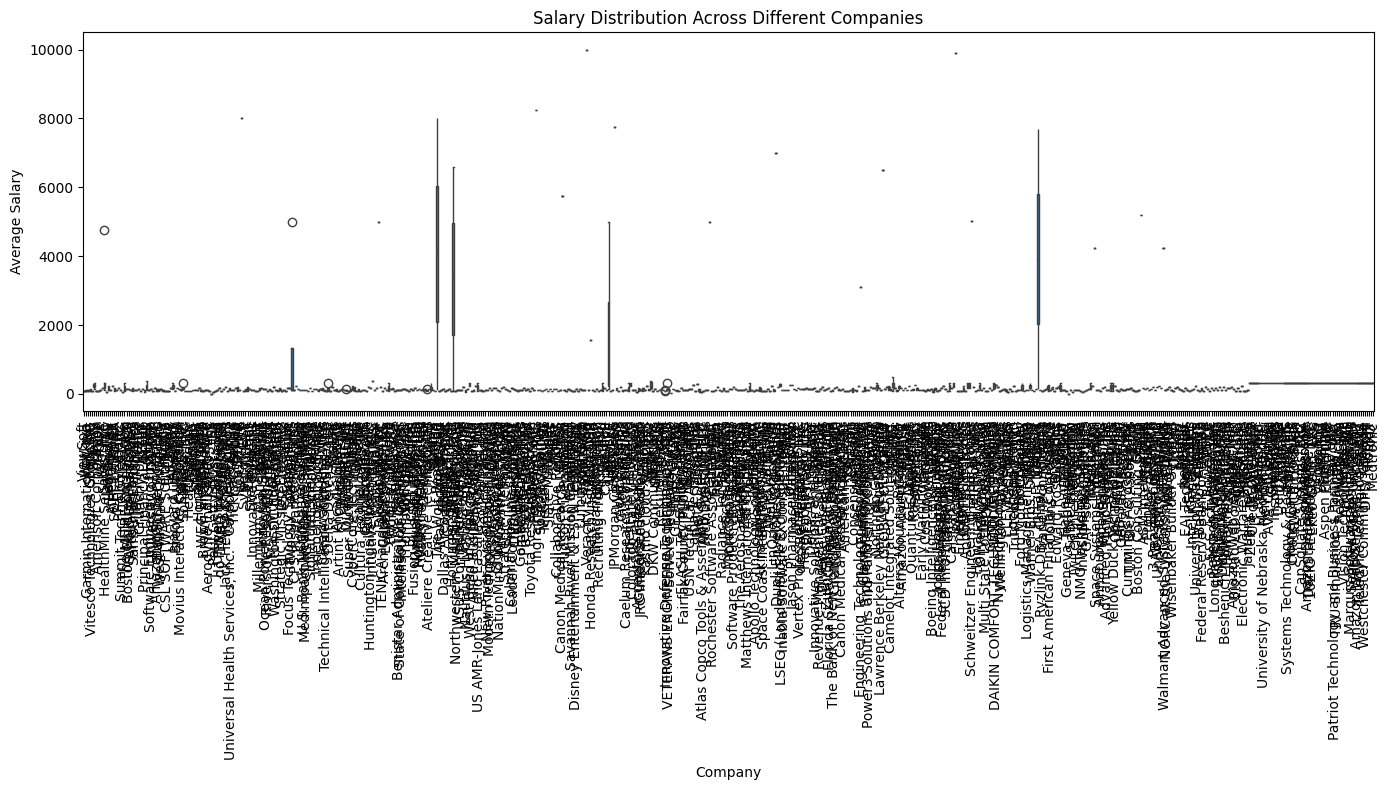

In [31]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Company', y='Average Salary', data=df)
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.title('Salary Distribution Across Different Companies')
plt.xlabel('Company')
plt.ylabel('Average Salary')
plt.tight_layout()
plt.show()

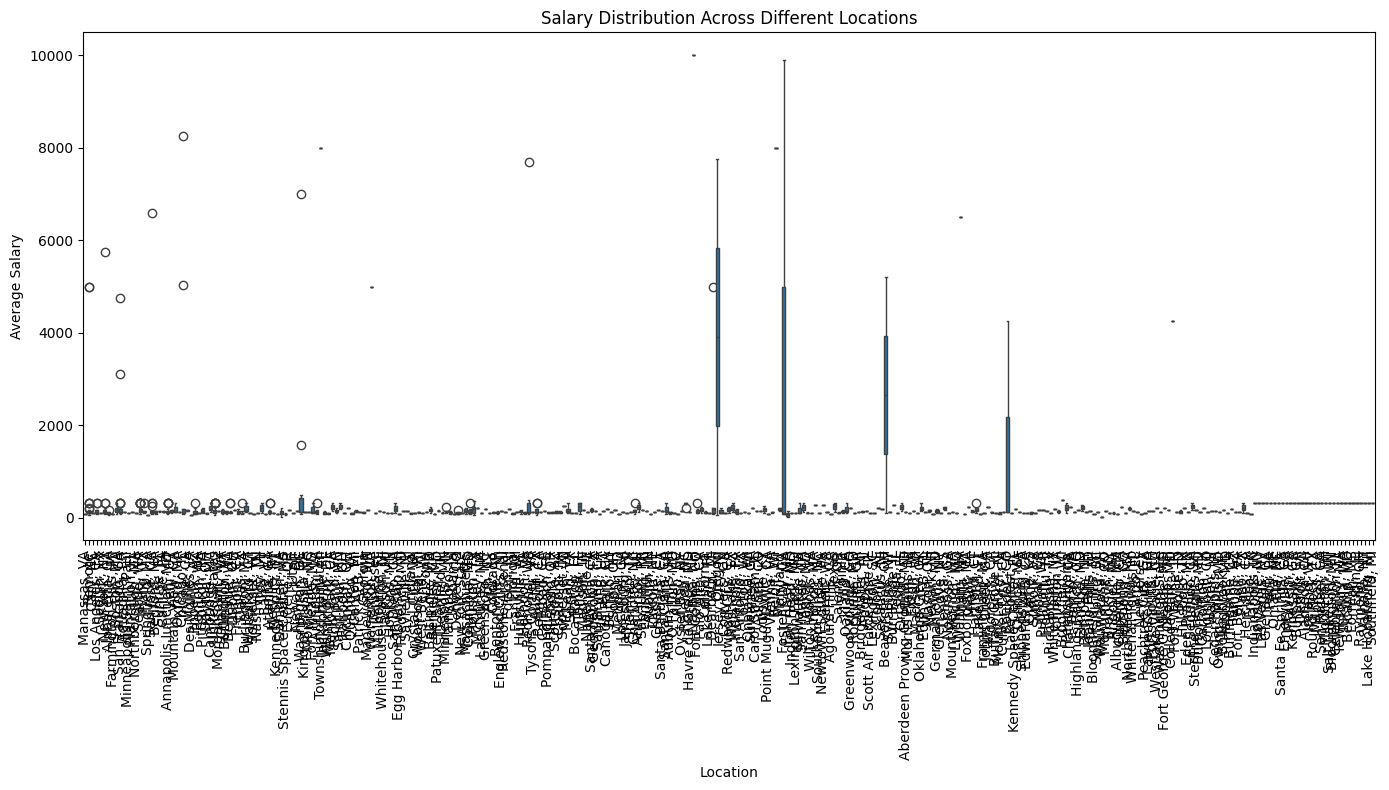

In [32]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Location', y='Average Salary', data=df)
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.title('Salary Distribution Across Different Locations')
plt.xlabel('Location')
plt.ylabel('Average Salary')
plt.tight_layout()
plt.show()

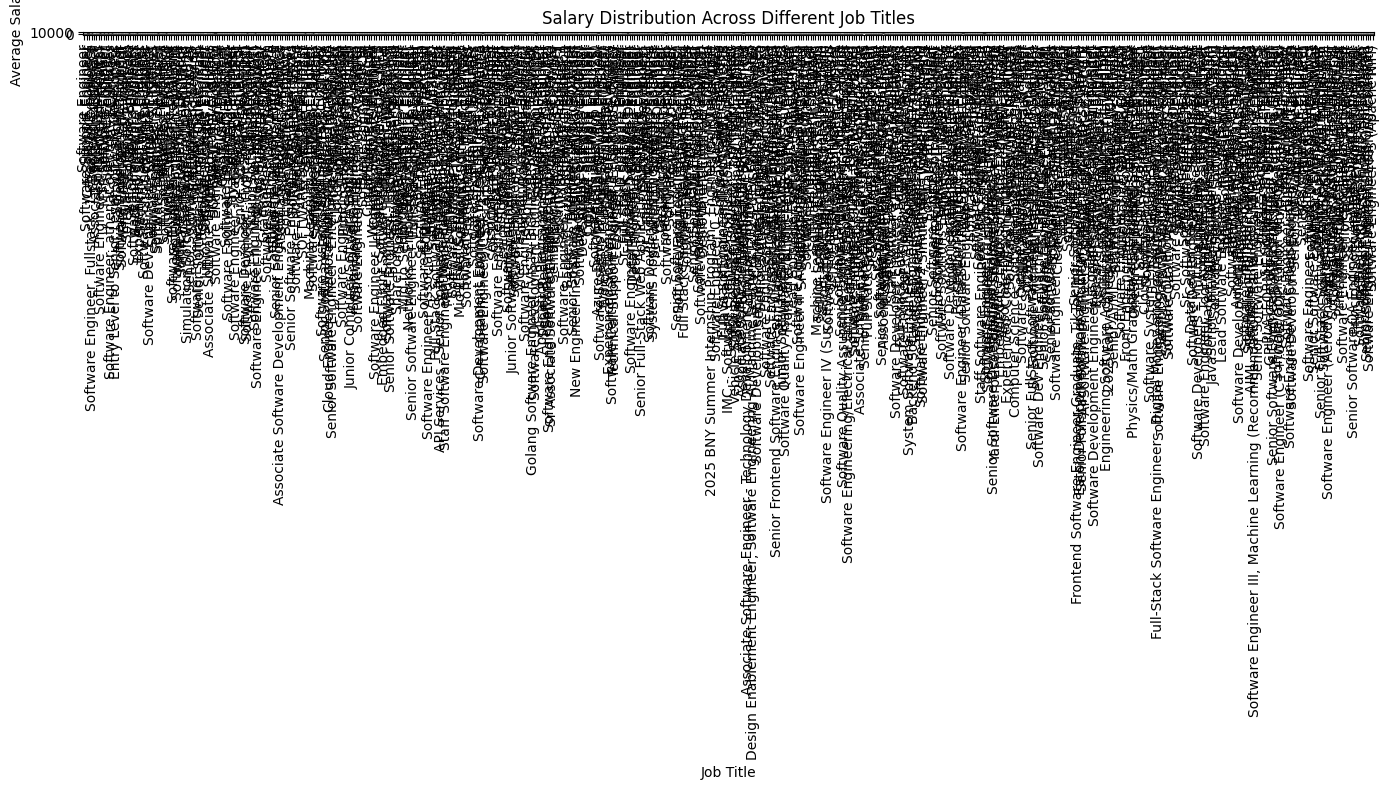

In [33]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Job Title', y='Average Salary', data=df)
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.title('Salary Distribution Across Different Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.tight_layout()
plt.show()

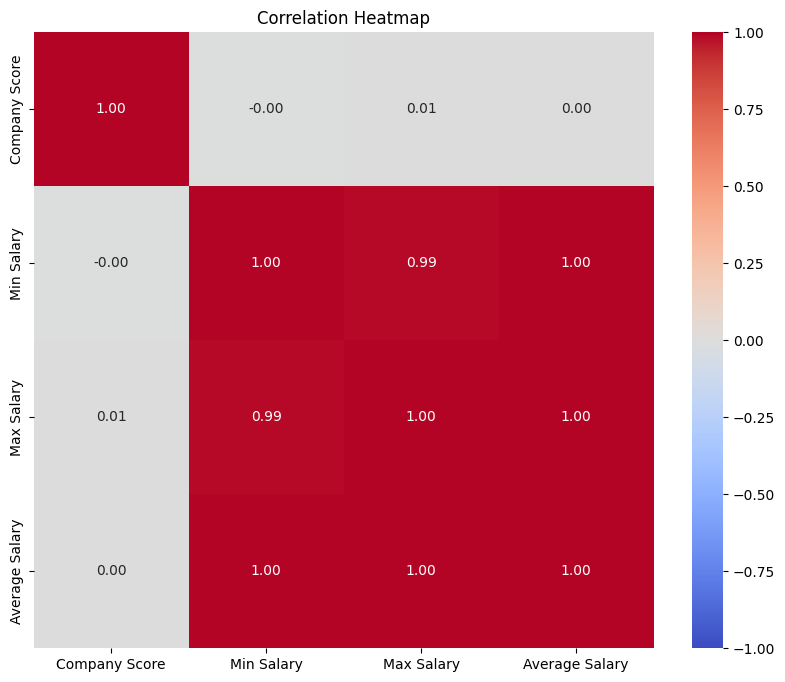

In [34]:
# Calculate the correlation matrix
correlation_matrix = df[['Company Score', 'Min Salary', 'Max Salary', 'Average Salary']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()